## Reading & Understanding the Dataset 

In [2]:
#Import required modules for datafram manipulation 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
pd.set_option('MAX_COLUMNS', None)

#Import Scikit Learn module 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


In [3]:
car_data = pd.read_csv("C:\\Users\\TOYIN OLAPE\\Documents\\Stutern\\Data Sets\\CarPrice_Assignment.csv")
car_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [5]:
car_data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Cleaning the Data 

From the Problem statement we have no use for the car id and car name because our client cant price there product based on another company's name 

In [6]:
car_data = car_data.drop(["car_ID","CarName"], axis =1)
car_data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


According to the dictionary the data type for "symboling" should not be integer

In [7]:
car_data['symboling'] = car_data['symboling'].astype(str)

In [8]:
pd.DataFrame({'missing':car_data.isna().mean(),
             'unicos':car_data.nunique(),
             'typs': car_data.dtypes})

,missing,unicos,typs
symboling,0.0,6,object
fueltype,0.0,2,object
aspiration,0.0,2,object
doornumber,0.0,2,object
carbody,0.0,5,object
drivewheel,0.0,3,object
enginelocation,0.0,2,object
wheelbase,0.0,53,float64
carlength,0.0,75,float64
carwidth,0.0,44,float64


## Visualization 

In [9]:
cat_col = car_data.select_dtypes(include=['object']).columns
num_col = car_data.select_dtypes(exclude=['object']).columns
df_cat = car_data[cat_col]
df_num = car_data[num_col]


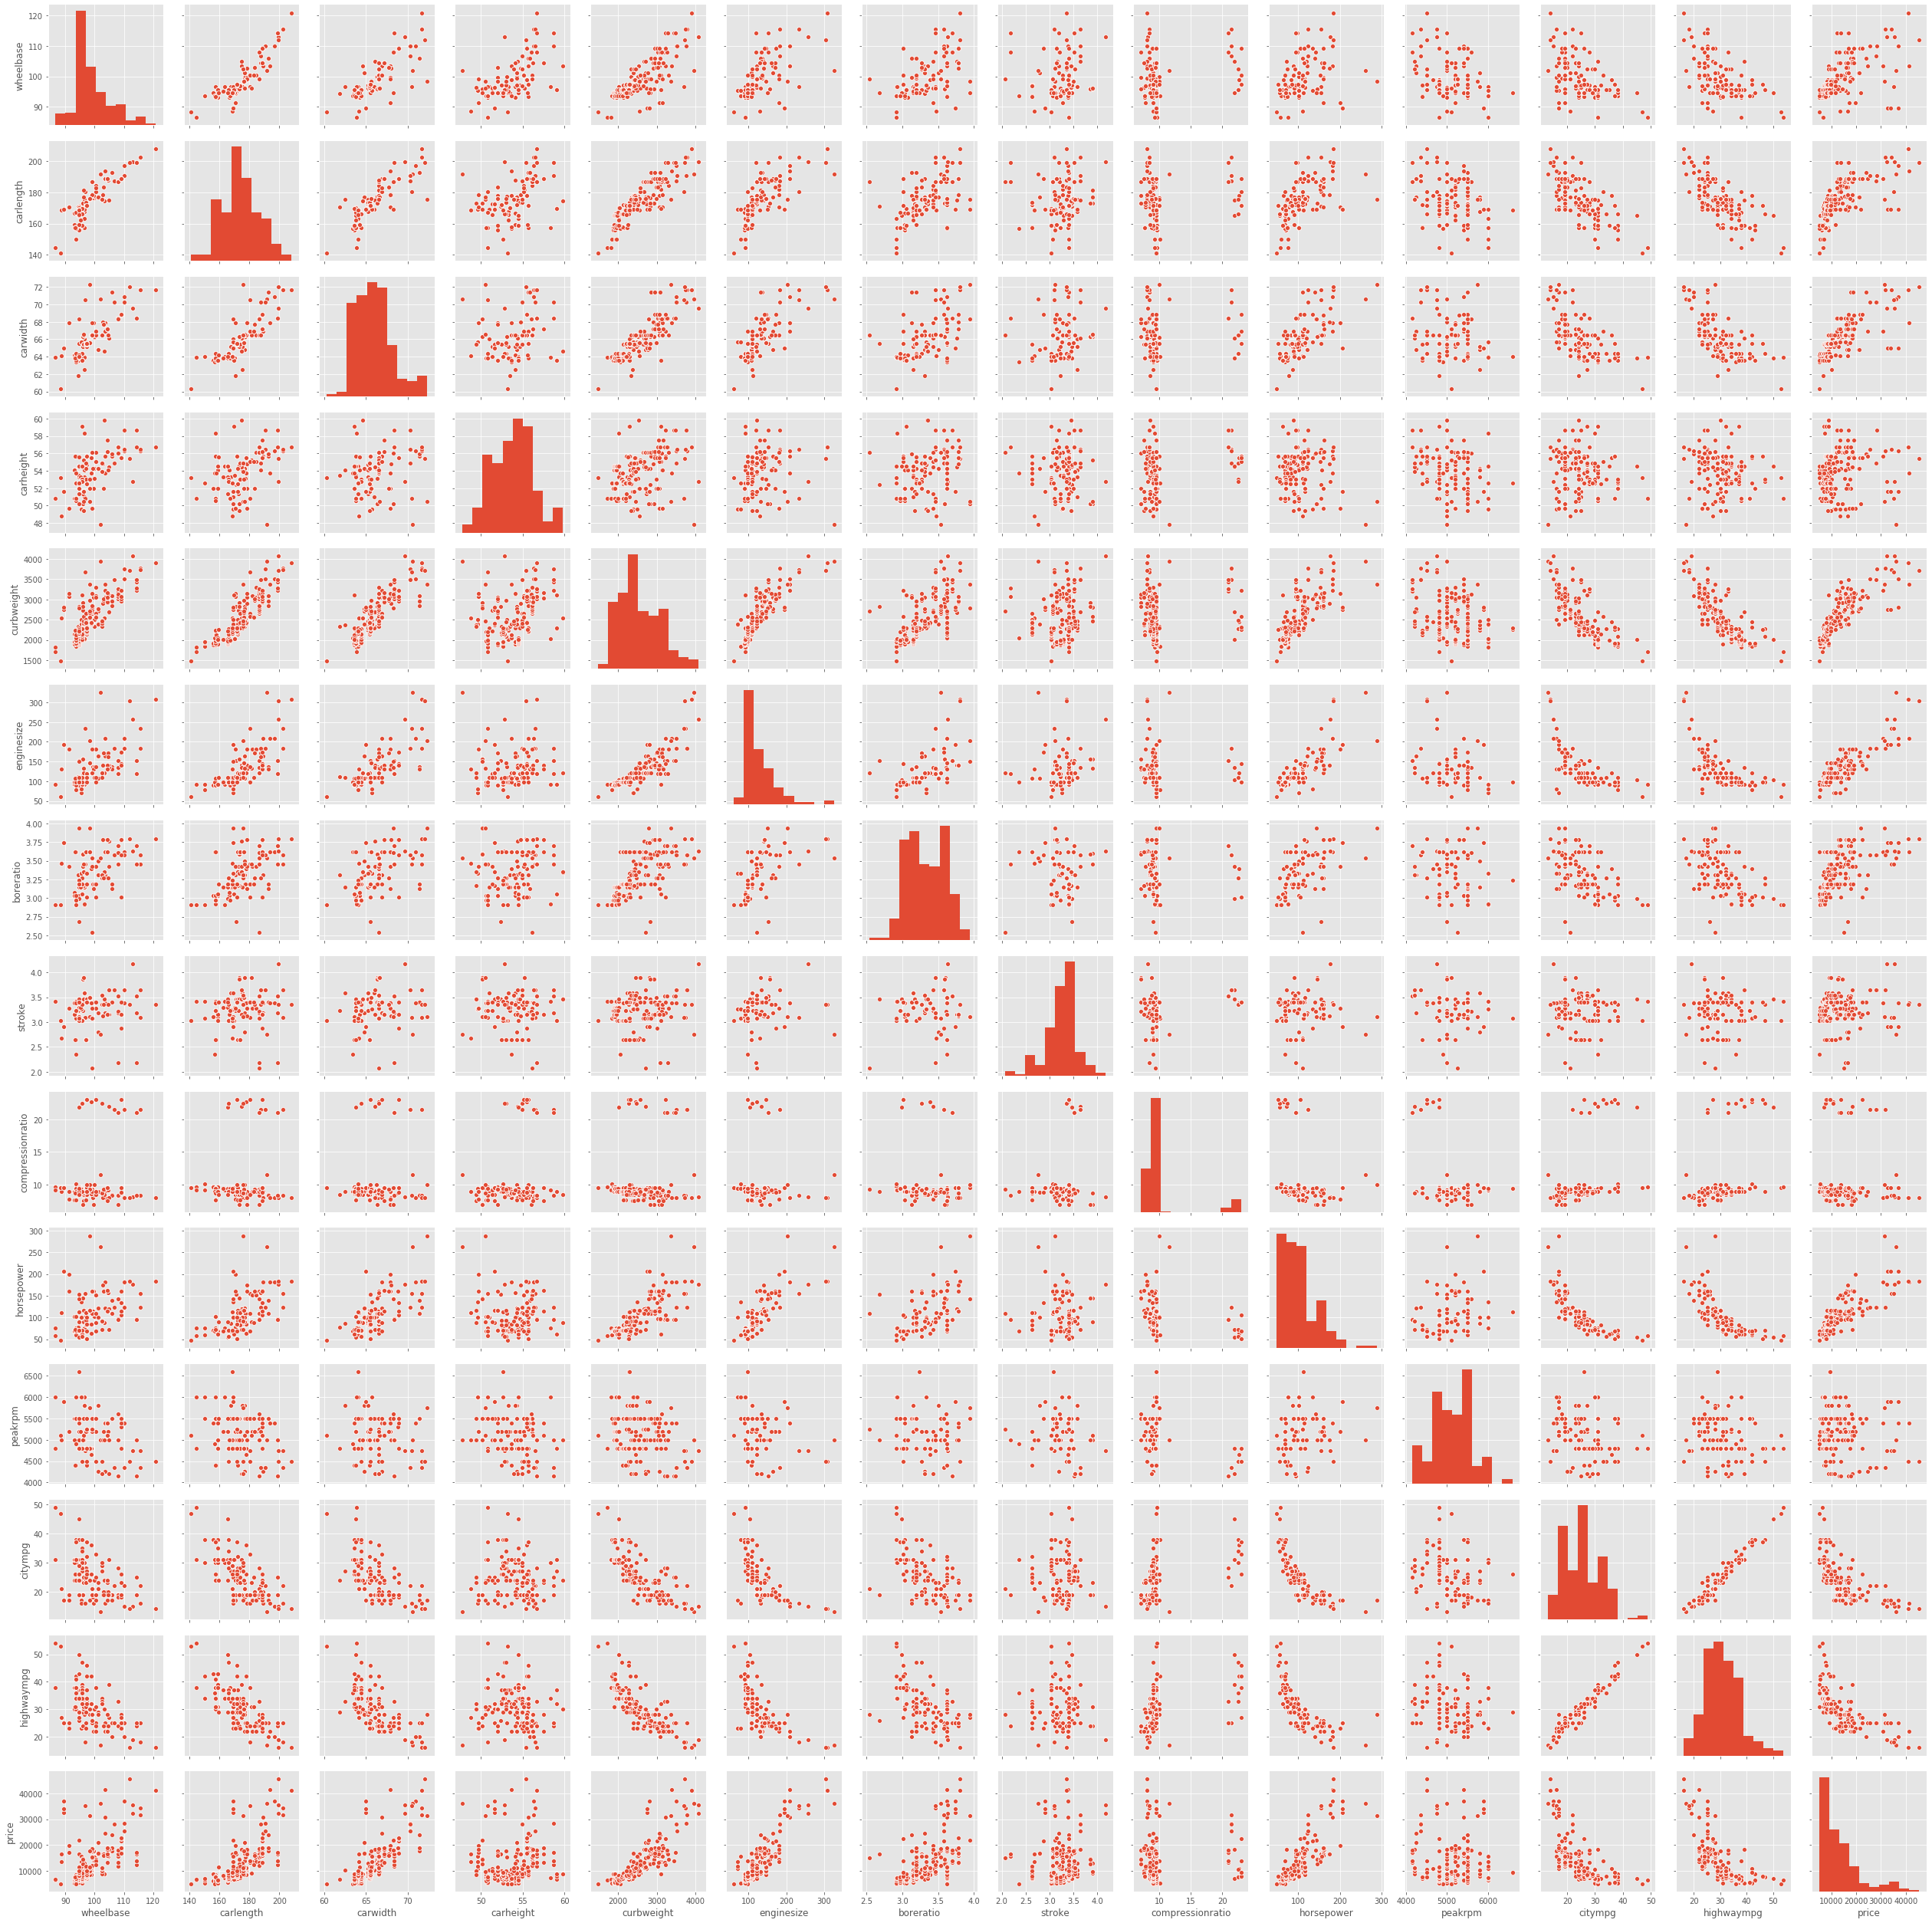

In [10]:
sns.pairplot(car_data[num_col])


Indepth look at the current prices of all the cars and comparing price with the following feature indentified above

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

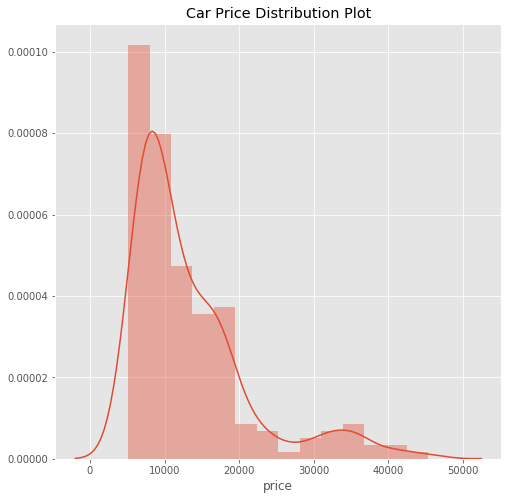

In [11]:
plt.figure(figsize=(8,8))

plt.title('Car Price Distribution Plot')
sns.distplot(car_data['price'])
car_data["price"].describe()

Visualization for the 5 features considered above

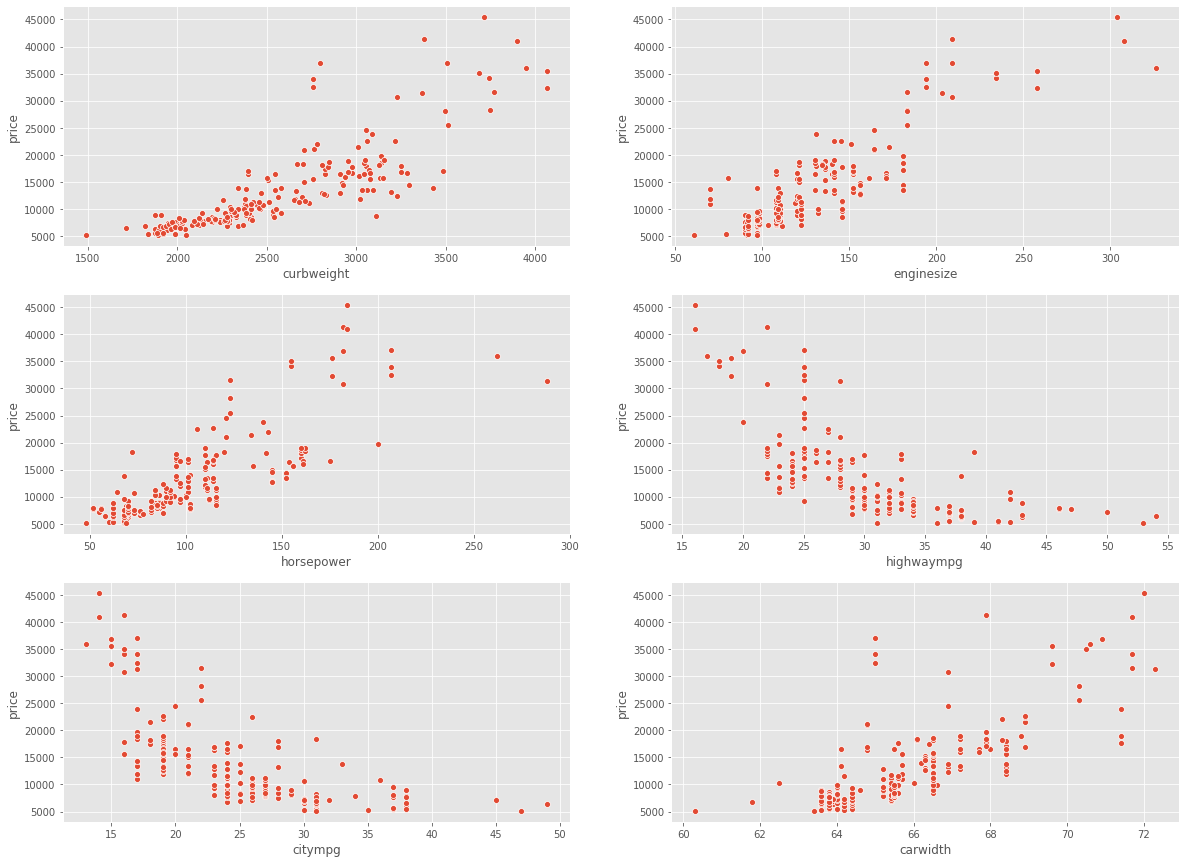

In [12]:
plt.figure(figsize=(20, 15))
plt.subplot(3,2,1)
sns.scatterplot(x = 'curbweight', y = 'price', data = car_data)
plt.subplot(3,2,2)
sns.scatterplot(x = 'enginesize', y = 'price', data = car_data)
plt.subplot(3,2,3)
sns.scatterplot(x = 'horsepower', y = 'price', data = car_data)
plt.subplot(3,2,4)
sns.scatterplot(x = 'highwaympg', y = 'price', data = car_data)
plt.subplot(3,2,5)
sns.scatterplot(x = 'citympg', y = 'price', data = car_data)
plt.subplot(3,2,6)
sns.scatterplot(x = 'carwidth', y = 'price', data = car_data)

Visualization for 4 categorical features to examine relation with the price

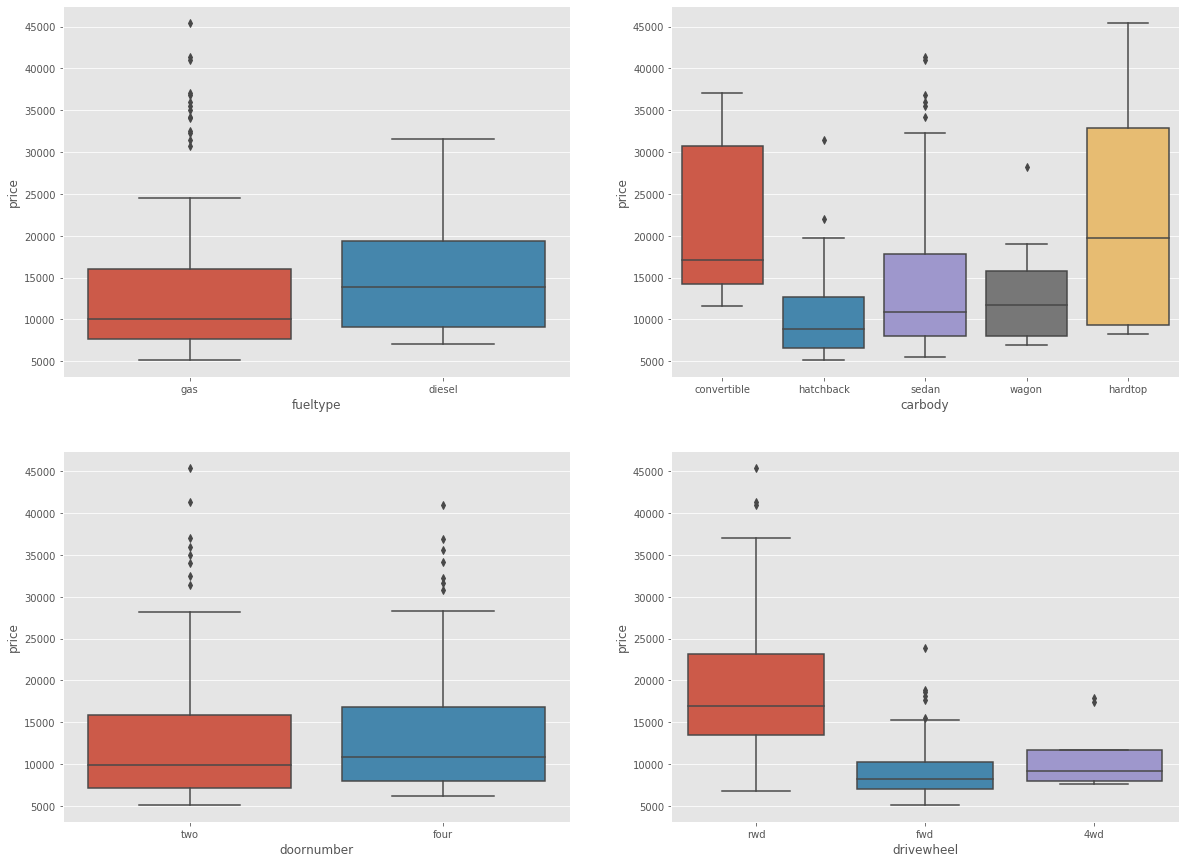

In [13]:
plt.figure(figsize=(20, 15))
plt.subplot(2,2,1)
sns.boxplot(x = 'fueltype', y = 'price', data = car_data, )
plt.subplot(2,2,2)
sns.boxplot(x = 'carbody', y = 'price', data = car_data)
plt.subplot(2,2,3)
sns.boxplot(x = 'doornumber', y = 'price', data = car_data)
plt.subplot(2,2,4)
sns.boxplot(x = 'drivewheel', y = 'price', data = car_data)


Inference
1. Average deisel car is more expensive that the average gas powered car.
2. With regards to carbody, hardtop has the highest price while hatchback has the lowest price.
3. While there is a prsence of outliers, there isnt a significant disparity between the prices of cars with different number of door.
4. Drivewheel fwd cars are markedly more pricy than both fwd and 4wd drivewheel cars 

## Data Preparation 

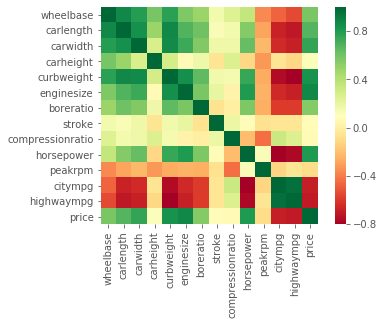

In [14]:
sns.heatmap(car_data.corr(), square=True, cmap='RdYlGn')

From the heat map the following features curbweight,enginesize,horsepowe,are strongly positively correlated with price. While the following festures citympg, highwaympg are strongly negatively correlated with price. 

R squared (Price & Horsepower): 0.653088356490231


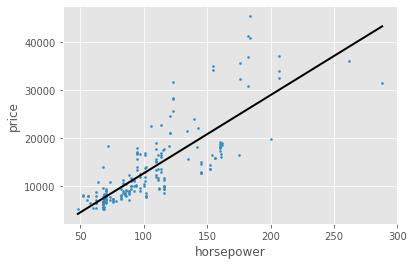

In [15]:
# Create arrays for features and target variable
X_h = car_data['horsepower'].values
y = car_data["price"].values

# Reshape X and y
y = y.reshape(-1,1)
X_h = X_h.reshape(-1,1)

# Create the regressor: reg
reg = LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X_h), max(X_h)).reshape(-1,1)

# Fit the model to the data
reg.fit(X_h, y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print("R squared (Price & Horsepower):",reg.score(X_h, y))

# Plot regression line
car_data.plot(kind="scatter", x ='horsepower', y='price',s = 4)
plt.plot(prediction_space, y_pred, color='black', linewidth=2)
plt.show()

R squared (Price & Enginesize): 0.7641291357806176


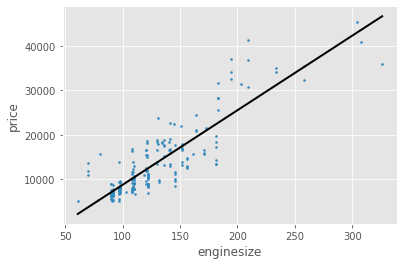

In [16]:
# Create arrays for features and target variable
X_e = car_data['enginesize'].values
y = car_data["price"].values

# Reshape X and y
y = y.reshape(-1,1)
X_e = X_e.reshape(-1,1)

# Create the regressor: reg
reg = LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X_e), max(X_e)).reshape(-1,1)

# Fit the model to the data
reg.fit(X_e, y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print("R squared (Price & Enginesize):",reg.score(X_e, y))

# Plot regression line
car_data.plot(kind="scatter", x ='enginesize', y='price',s = 4)
plt.plot(prediction_space, y_pred, color='black', linewidth=2)
plt.show()

R squared (Price & Curbweight): 0.6977342414446954


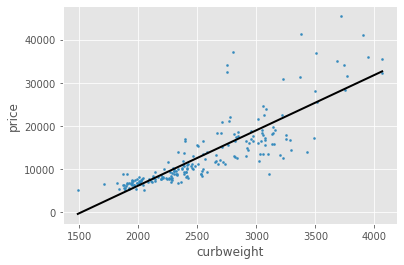

In [17]:
# Create arrays for features and target variable
X_c = car_data['curbweight'].values
y = car_data["price"].values

# Reshape X and y
y = y.reshape(-1,1)
X_c = X_c.reshape(-1,1)

# Create the regressor: reg
reg = LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X_c), max(X_c)).reshape(-1,1)

# Fit the model to the data
reg.fit(X_c, y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print("R squared (Price & Curbweight):",reg.score(X_c, y))

# Plot regression line
car_data.plot(kind="scatter", x ='curbweight', y='price',s = 4)
plt.plot(prediction_space, y_pred, color='black', linewidth=2)
plt.show()

Multiple linear regression based on the prominent features observed from the heatmap. 

In [19]:
# Create arrays for features and target variable
X = car_data[['horsepower','carwidth','curbweight','enginesize']].values
y = car_data["price"].values

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train,y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))


R^2: 0.7758631573177659
Root Mean Squared Error: 3940.708295361663
